In [1]:
source("../enrichment_functions.R")

Bioconductor version '3.12' is out-of-date; the current release version '3.14'
  is available with R version '4.1'; see https://bioconductor.org/install

Registered S3 method overwritten by 'sets':
  method        from   
  print.element ggplot2


Attaching package: ‘sets’


The following object is masked from ‘package:msigdbr’:

    %>%




clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:biomaRt’:

    select


The following object is masked from ‘package:sets’:

    %>%


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘data.table’


The following object is mas

[1] "aandersoni_regen upregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen downregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen upregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen downregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen upregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen downregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen upregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen downregulated"
[1] "aandersoni_regen total_datas

In [2]:
human <- readRDS("/data/timonaj/biomart_orthologs/human.RDS")

In [3]:
pred_genes <- fread("/data/timonaj/Arash_code/oncoFeats/total_ml_pred.txt")

In [4]:
pred_genes

Gene,GeneType
<chr>,<chr>
CBX1,high
CUL2,high
TOMM40L,high
USP32,high
GCG,high
SMPD1,high
PRM2,high
SIM2,high
PLCE1,high


In [5]:
cancer_mut_freq <- list()
cancer_type_label <- character()
mutation_freq_val <- numeric()
for(file in list.files("../somatic_cancer_mutations/mut_freq")) {
    cur_mut_freq<-fread(paste("../somatic_cancer_mutations/mut_freq/", file, sep=""), header=F)
    cur_mut_freq<-cur_mut_freq[1:nrow(cur_mut_freq)-1,]
    donor_number <- length(unique(cur_mut_freq$V1))
    gene_mut_freq <- table(cur_mut_freq$V2)/donor_number
    gene_mut_freq_mat <- data.frame(gene_mut_freq)
    
    gene_names <- getLDS(attributes=c("ensembl_gene_id"), filters="ensembl_gene_id",
                         values=gene_mut_freq_mat$Var1,
                         mart=human,attributesL=c("hgnc_symbol"),
                         martL=human)
    common_genes <- gene_names[gene_names$Gene.stable.ID %in% gene_mut_freq_mat$Var1 & gene_names$HGNC.symbol != "",]
    freq_genes <- gene_mut_freq_mat[gene_mut_freq_mat$Var1 %in% common_genes$Gene.stable.ID,]
    
    geneName <- character()
    for(i in 1:nrow(freq_genes)) {
        current_gene <- freq_genes$Var1[i]
        name <- common_genes$HGNC.symbol[common_genes$Gene.stable.ID %in% current_gene]
        geneName <- append(geneName, name[1], length(geneName))
    }
    cancer_type_label <- append(cancer_type_label, freq_genes$Freq,
                                length(cancer_type_label))
    mutation_freq_val <- append(mutation_freq_val,
                                rep(gsub("_.*","",file), length(freq_genes$Freq)),
                                length(mutation_freq_val))
    
    cancer_mut_freq[[gsub("_.*","",file)]] <- cbind(freq_genes, "geneName" = geneName)
    print(paste(gsub("_.*","",file), ":", donor_number, "donors  :", nrow(gene_mut_freq_mat),  "mutated genes :",
                min(table(cur_mut_freq$V2)), "minimum recurrence", max(table(cur_mut_freq$V2)), "maximum recurrence"))
}

[1] "ALL : 148 donors  : 742 mutated genes : 1 minimum recurrence 16 maximum recurrence"
[1] "AML : 166 donors  : 511 mutated genes : 1 minimum recurrence 25 maximum recurrence"
[1] "BLCA : 411 donors  : 21540 mutated genes : 1 minimum recurrence 224 maximum recurrence"
[1] "BRCA : 1020 donors  : 21560 mutated genes : 1 minimum recurrence 341 maximum recurrence"
[1] "CESC : 289 donors  : 21376 mutated genes : 1 minimum recurrence 117 maximum recurrence"
[1] "COAD : 402 donors  : 23049 mutated genes : 1 minimum recurrence 260 maximum recurrence"
[1] "DLBC : 38 donors  : 5318 mutated genes : 1 minimum recurrence 20 maximum recurrence"
[1] "GBM : 388 donors  : 18875 mutated genes : 1 minimum recurrence 114 maximum recurrence"
[1] "HNSC : 508 donors  : 20599 mutated genes : 1 minimum recurrence 323 maximum recurrence"
[1] "KICH : 66 donors  : 3301 mutated genes : 1 minimum recurrence 21 maximum recurrence"
[1] "KIRC : 361 donors  : 13733 mutated genes : 1 minimum recurrence 141 maximum rec

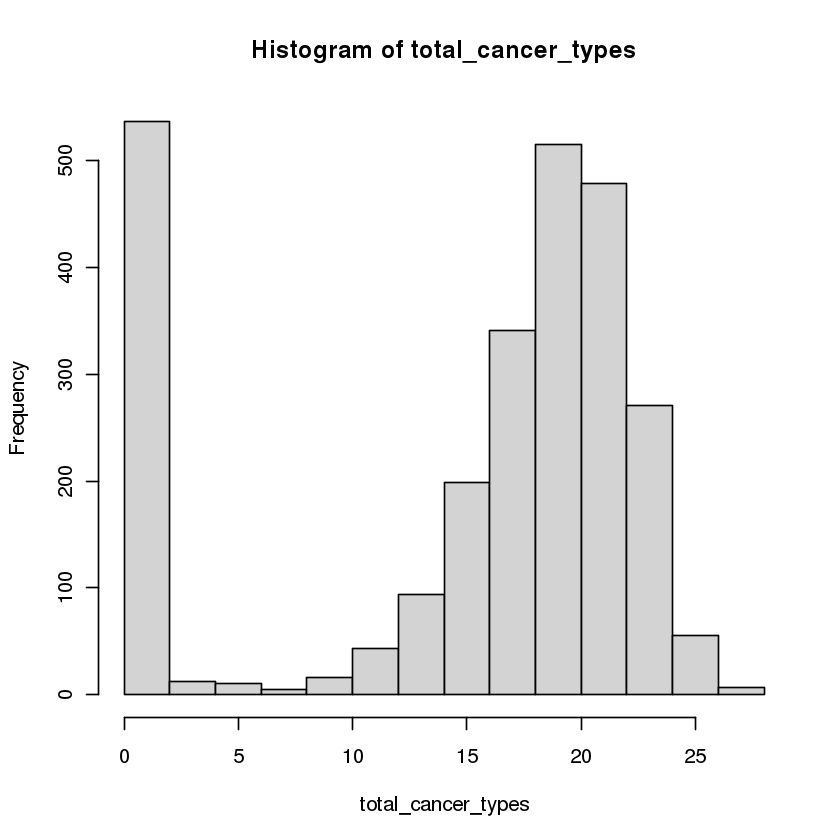

In [6]:
set.seed(5)
gene_list <- pred_genes$Gene
total_cancer_types <- numeric(length(gene_list))
mut_freq_mat <- matrix(,nrow= length(gene_list), ncol= length(cancer_mut_freq))
rand_mut_freq_mat <- matrix(,nrow= length(gene_list), ncol= length(cancer_mut_freq))
for(i in 1:length(gene_list)){
    gene <- gene_list[i]
    in_list <- logical(length(cancer_mut_freq))
    for(j in 1:length(cancer_mut_freq)) {
        #cancer_mut_freq[[i]]$ %in% recurrent_wrs_list$upregulated[[j]]
        in_list[j] <- gene %in% cancer_mut_freq[[j]]$geneName
        
        if(gene %in% cancer_mut_freq[[j]]$geneName) {
            frequencies <- cancer_mut_freq[[j]]
            mut_freq_mat[i,j] <- frequencies$Freq[frequencies$geneName %in% gene][1]
            rand_mut_freq_mat[i,j] <- sample(frequencies$Freq,1)
        } else {
            mut_freq_mat[i,j] <- 0.00000000000001
            rand_mut_freq_mat[i,j] <- 0.00000000000001
        }
    }
    total_cancer_types[i] <- sum(in_list)
}

colnames(mut_freq_mat) <- names(cancer_mut_freq)
rownames(mut_freq_mat) <- names(gene_list)
colnames(rand_mut_freq_mat) <- names(cancer_mut_freq)
rownames(rand_mut_freq_mat) <- names(gene_list)

# across how many cancer types are these genes included in
hist(total_cancer_types)

In [7]:
#  fraction of genes with in the top 10  percent  of mutation frequencies
fractions <- numeric()
c_type <- character()
exp_label <- character()
for(i in 1:length(cancer_mut_freq)) {
    ct <- names(cancer_mut_freq)[i]
    freq_df <- cancer_mut_freq[[ct]]
    ordered_freqs <- freq_df[order(freq_df$Freq, decreasing = T),]
    thresh <- min(ordered_freqs$Freq[1:((nrow(ordered_freqs))*1)])
    
    fraction_real <- mut_freq_mat[,ct]
    fractions <- append(fractions,fraction_real,length(fractions))
    exp_label<- append(exp_label,pred_genes$GeneType,length(exp_label))
    
    #fraction_rand <- cancer_mut_freq[[ct]]$Freq
    #fractions <- append(fractions,fraction_rand,length(fractions))
    #exp_label<- append(exp_label,rep("Random", length(fraction_rand)),length(exp_label))
    
    c_type <- append(c_type,
                     rep(ct,
                         #(length(fraction_real) + length(fraction_rand))),
                         
                         (length(fraction_real))),
                     length(c_type))
}

In [8]:
freq_fractions_df <- data.frame("Mutation_Frequencies" = fractions,
                                "Cancer_Type" = c_type,
                                "Label" = exp_label)


Warning message:
“Removed 7416 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 7416 rows containing non-finite values (stat_compare_means).”


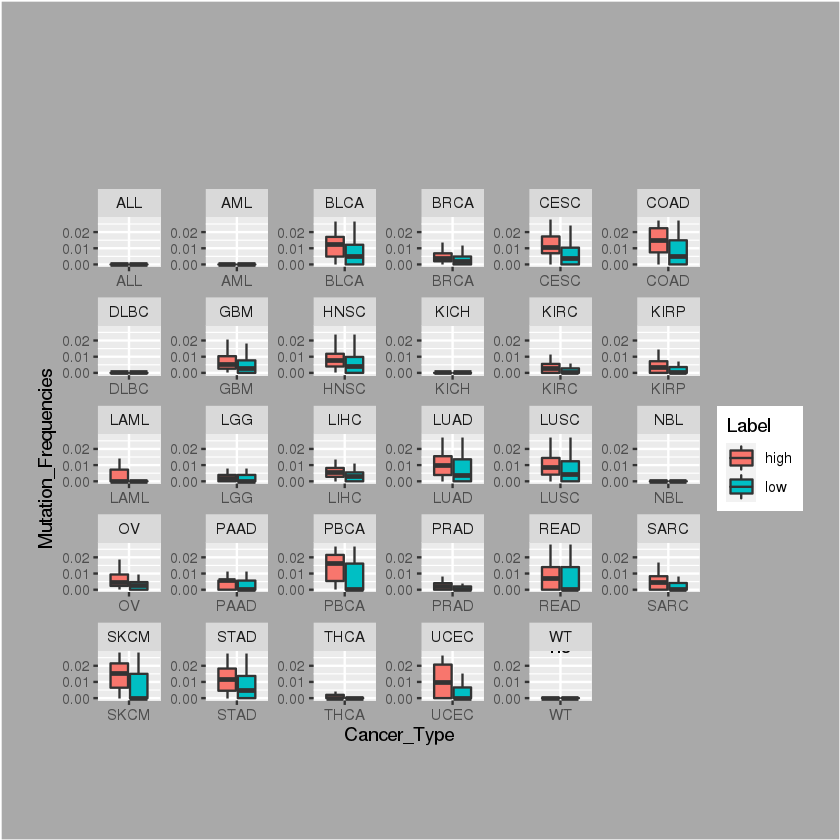

In [9]:
ggplot(freq_fractions_df, aes(x=Cancer_Type, y=Mutation_Frequencies,
                                   fill=Label)) + 
geom_boxplot(outlier.shape = NA) +
scale_y_continuous(limits = quantile(freq_fractions_df$Mutation_Frequencies, c(0.1, 0.9)))+
facet_wrap(~Cancer_Type, scale="free") +
stat_compare_means(aes(group = Label), label = "p.signif") + 
theme(plot.margin = margin(4,.8,2,.8, "cm"),
        plot.background = element_rect(fill = "darkgrey"))

Warning message:
“Removed 7416 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 7416 rows containing non-finite values (stat_compare_means).”


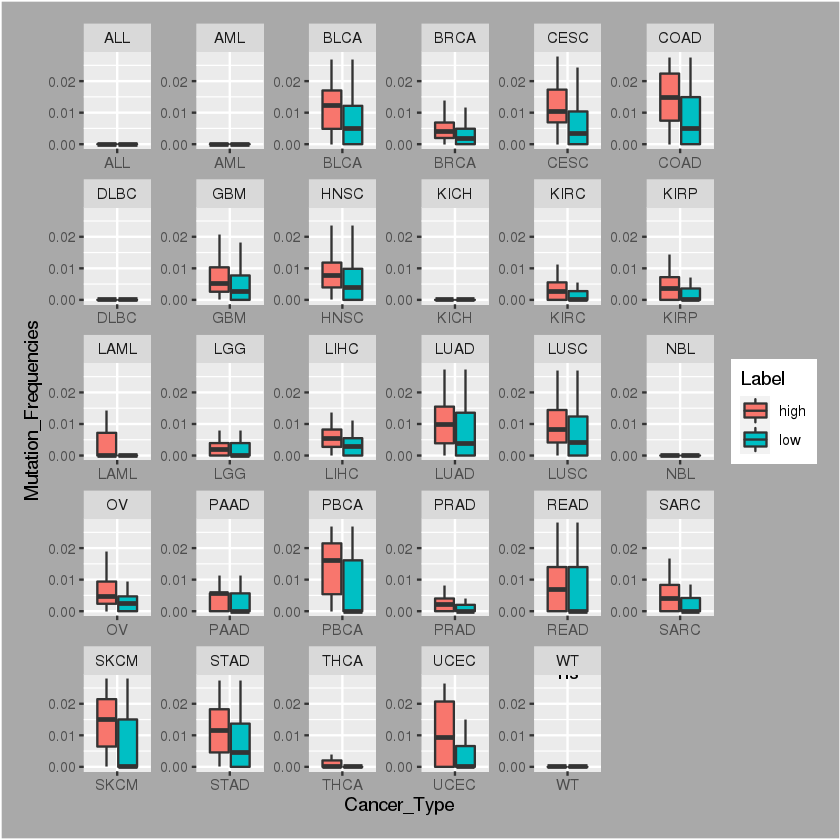

In [10]:
ggplot(freq_fractions_df, aes(x=Cancer_Type, y=Mutation_Frequencies,
                                   fill=Label)) + 
geom_boxplot(outlier.shape = NA) +
scale_y_continuous(limits = quantile(freq_fractions_df$Mutation_Frequencies, c(0.1, 0.9)))+
facet_wrap(~Cancer_Type, scale="free") +
stat_compare_means(aes(group = Label), label = "p.signif") + 
theme(plot.margin = margin(.5,.5,.5,.5, "cm"),
        plot.background = element_rect(fill = "darkgrey"))